In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

**Ejercicios**
1. Cargad el csv.

In [2]:
df = pd.read_csv("merchant_ejercicios_apply.csv", index_col = 0)
df.head(1)

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,No,3.76,54,26.0,8.0,10.0,1.0,9.0,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,NaN,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.0,14.0,54.0,14.29,Buena


2. ¿Qué columnas tienen nulos?

In [6]:
porc_nulos = (df.isnull().sum()/df.shape[0])*100
# Dividimos el total de valores nulos entre el numero total de datos para cada columna, para sacar el porcentaje
porc_nulos

title                           0.000000
price                           0.000000
retail_price                    0.000000
units_sold                      0.000000
uses_ad_boosts                  0.000000
rating_sold                     0.000000
rating_count                    0.000000
rating_five_count               2.860776
rating_four_count               2.860776
rating_three_count              2.860776
rating_two_count                2.860776
rating_one_count                2.860776
badge_local_product             0.000000
badge_product_quality           0.000000
badge_fast_shipping             0.000000
tags                            0.000000
product_color                   2.606484
product_variation_size_id       0.890019
shipping_option_name            0.000000
shipping_option_price           0.000000
shipping_is_express             0.000000
countries_shipped_to            0.000000
inventory_total                 0.000000
origin_country                  1.080737
merchant_name   

3. Explorad los nulos que hay en el DataFrame.

In [7]:
# lo convertimos en DataFrame, creando una nueva columna % nulos
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
# y lo filtramos para que solo nos aparezcan los valores que tienen nulos
df_nulos[df_nulos['%_nulos'] > 0]

,%_nulos
rating_five_count,2.860776
rating_four_count,2.860776
rating_three_count,2.860776
rating_two_count,2.860776
rating_one_count,2.860776
product_color,2.606484
product_variation_size_id,0.890019
origin_country,1.080737
merchant_name,0.254291
merchant_info_subtitle,18.690401


4. Con lo aprendido en la lección de hoy gestiona los nulos de la forma que consideres más correcta.

In [8]:
# Sacamos una lista de las categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['product_color', 'product_variation_size_id', 'origin_country',
       'merchant_name', 'merchant_info_subtitle'],
      dtype='object')


In [13]:
# sacamos el 'value_counts()'(contamos los valores únicos y los comparamos al total de valores) de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0]*100)  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna PRODUCT_COLOR


product_color
black               19.198983
white               16.147489
yellow               6.675143
pink                 6.293706
blue                 6.293706
                      ...    
red & blue           0.063573
winered & yellow     0.063573
claret               0.063573
lightpurple          0.063573
gold                 0.063573
Name: count, Length: 101, dtype: float64

........................
La distribución de las categorías para la columna PRODUCT_VARIATION_SIZE_ID


product_variation_size_id
S            40.750159
XS           22.631914
M            12.714558
XXS           6.357279
L             3.115067
               ...    
White         0.063573
32/L          0.063573
Size XXS      0.063573
Pack of 1     0.063573
SIZE S        0.063573
Name: count, Length: 106, dtype: float64

........................
La distribución de las categorías para la columna ORIGIN_COUNTRY


origin_country
CN    96.376351
US     1.970757
VE     0.317864
SG     0.127146
AT     0.063573
GB     0.063573
Name: count, dtype: float64

........................
La distribución de las categorías para la columna MERCHANT_NAME


merchant_name
广州唯适唯服饰有限公司                              0.953592
greatexpectationstechnology              0.762873
sjhdstoer                                0.572155
shuilingjiaointernationaltradecompany    0.508582
sangboostore                             0.508582
                                           ...   
asmalltwistofsweetfruit                  0.063573
supumawallsticker                        0.063573
haoyouduooo                              0.063573
successed                                0.063573
aishoppingmall                           0.063573
Name: count, Length: 957, dtype: float64

........................
La distribución de las categorías para la columna MERCHANT_INFO_SUBTITLE


merchant_info_subtitle
86 % avis positifs         8.582327
85 % avis positifs         8.264463
87 % avis positifs         6.802289
88 % avis positifs         6.611570
84 % avis positifs         6.484425
                             ...   
83% Positives Feedback     0.063573
61 % avis positifs         0.063573
84% ردود فعل إيجابية       0.063573
56 % avis positifs         0.063573
84% Positive Feedback      0.063573
Name: count, Length: 73, dtype: float64

........................


In [ ]:
# PRODUCT_COLOR
# Tiene un 	2.606484% de nulos
# Los datos que mas se repiten son: (%)
#       black               19.198983 
#       white               16.147489
#       yellow               6.675143
#*****************know***********************


In [ ]:
# PRODUCT_VARIATION_SIZE_ID
# Tiene un 	0.890019% de nulos
# Los datos que mas se repiten son:(%)
#      S            40.750159 
#      XS           22.631914 
#      M            12.714558 
#**********************moda*****************

In [ ]:
# ORIGIN_COUNTRY
# Tiene un 	1.080737% de nulos
# Los datos que mas se repiten son:(%)
#       CN    96.376351 
#       US     1.970757
#       VE     0.317864
#*************** moda

In [ ]:
# MERCHANT_NAME
# Tiene un 	0.254291 % de nulos
# Los datos que mas se repiten son:(%)
#       广州唯适唯服饰有限公司                     0.953592
#       greatexpectationstechnology              0.762873
#       sjhdstoer                                0.572155
#       shuilingjiaointernationaltradecompany    0.508582
#       sangboostore                             0.508582
#*****************know***********************

In [ ]:
# MERCHANT_INFO_SUBTITLE
# Tiene un 	18.690401 % de nulos
# Los datos que mas se repiten son:(%)
#       86 % avis positifs         8.582327
#       85 % avis positifs         8.264463
#       87 % avis positifs         6.802289
#       88 % avis positifs         6.611570
#       84 % avis positifs         6.484425
#*****************know***********************

In [17]:
columnas_moda = ['product_variation_size_id', 'origin_country']
columnas_desconocido =['product_color', 'merchant_name' ,'merchant_info_subtitle']

In [16]:
# hacemos el reemplazo por moda
# iteramos por la lista creada en el paso anterior:
for columna in columnas_moda:
    
    # calculamos la moda para la columna por la que estamos iterando
    moda = df[columna].mode()[0]    
    
    # utilizando el método fillna reemplazamos los valores nulos por la moda calculada en el paso anterior. 
    df[columna] = df[columna].fillna(moda)

# por último chequeamos si se han eliminado los nulos en las columnas de "marital" y "loan"
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

df[columnas_moda].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


product_variation_size_id    0
origin_country               0
dtype: int64

In [18]:
# hacemos el reemplazo por know
# iteramos por la lista de columnas a las que le vamos a cambiar los nulos por "Uknown"
for columna in columnas_desconocido:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df[columna] = df[columna].fillna("Unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


product_color             0
merchant_name             0
merchant_info_subtitle    0
dtype: int64

In [19]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count'],
      dtype='object')


In [ ]:
# lo primero que vamos a hacer es calcular % el número de nulos que tenemos en cada una de las columnas numericas
df[nulos_esta_num].isnull().sum() / df.shape[0]*100

rating_five_count     2.860776
rating_four_count     2.860776
rating_three_count    2.860776
rating_two_count      2.860776
rating_one_count      2.860776
dtype: float64

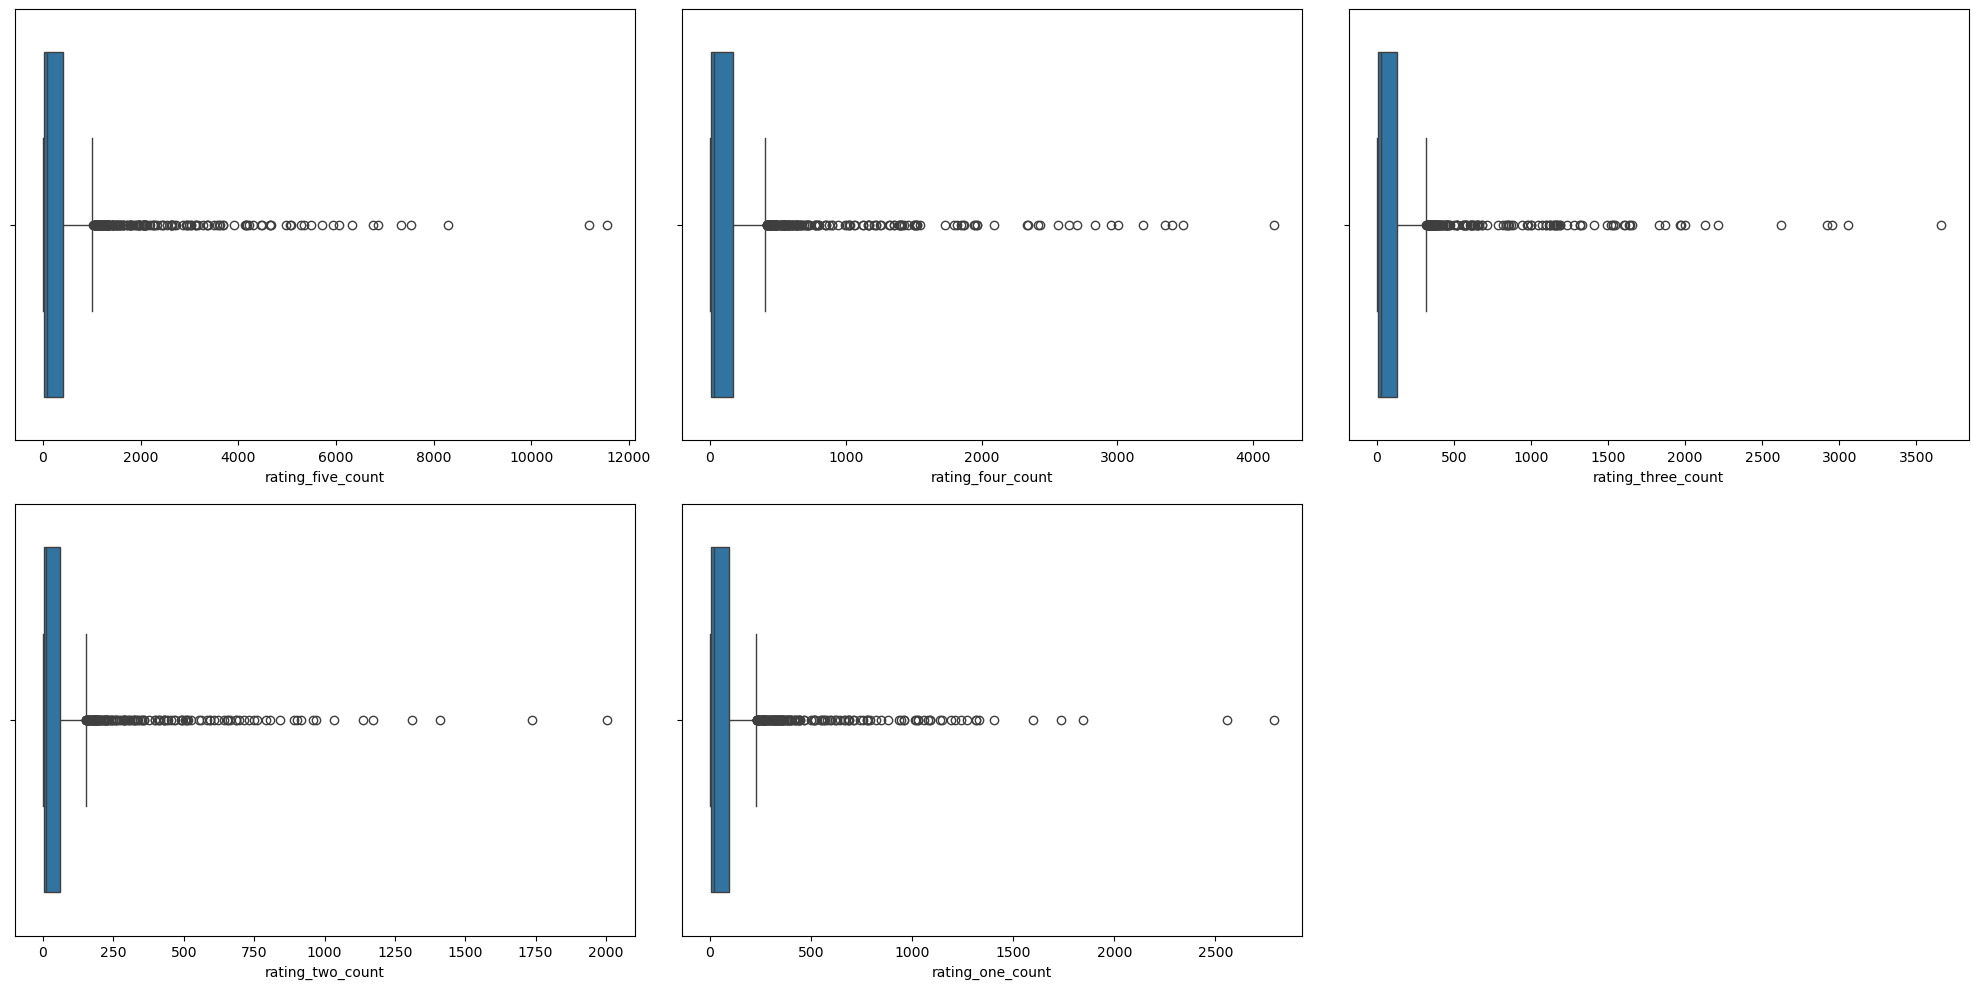

In [ ]:
# Ver si tenemos valores atípicos (outliers)
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

In [23]:
# Creamos una copia del DataFrame usando copy()
df_copia = df.copy()
df_copia.head(1)

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,No,3.76,54,26.0,8.0,10.0,1.0,9.0,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.0,14.0,54.0,14.29,Buena


In [24]:
# Para rating_five_count,rating_four_count, rating_three_count usamos el método InterativeImputer
# instanciamos las clases, máx iteraciones= 20 semilla para el generador = 42 ???????????????
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[['rating_five_count','rating_four_count', 'rating_three_count']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[2.600e+01, 8.000e+00, 1.000e+01],
       [2.269e+03, 1.027e+03, 1.118e+03],
       [4.300e+01, 1.800e+01, 2.300e+01],
       ...,
       [2.800e+01, 1.100e+01, 7.000e+00],
       [2.400e+01, 1.500e+01, 8.000e+00],
       [8.000e+00, 3.000e+00, 1.000e+00]])

In [25]:
# Nos devuelve un array, que tendremos que sumar a nuestra copia de DF
df_copia[['rating_five_count','rating_four_count', 'rating_three_count']] = imputer_iterative_imputado
# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_copia[['rating_five_count','rating_four_count', 'rating_three_count']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
rating_five_count     0
rating_four_count     0
rating_three_count    0
dtype: int64 nulos


In [26]:
## Las otras dos variables las hacemos con ell KNNImputer. NOTA, la ejecución de esta celda puede tardar un ratito

# instanciamos la clase del KNNImputer. vecinos cercanos =5
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_copia[['rating_two_count','rating_one_count']])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[1.000e+00, 9.000e+00],
       [6.440e+02, 1.077e+03],
       [8.000e+00, 7.000e+00],
       ...,
       [7.000e+00, 9.000e+00],
       [3.000e+00, 9.000e+00],
       [0.000e+00, 2.000e+00]])

In [27]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_copia[['rating_two_count','rating_one_count']] = imputer_knn_imputado


# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_copia[['rating_two_count','rating_one_count']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
rating_two_count    0
rating_one_count    0
dtype: int64 nulos


5. Guarda el csv con las columnas sin nulos

In [29]:
df_copia.to_csv("bank-additional-clean-nonulls.csv",index=False)